<a href="https://colab.research.google.com/github/ArshiaRa/Binary-sentiment-classification/blob/main/Arshia_Rashidi_Mehrabadi_FInal_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
import tensorflow as tf
from keras.datasets import imdb
from keras.utils.vis_utils import plot_model
from keras import regularizers
from sklearn.metrics import confusion_matrix

In [ ]:
tf.random.set_seed(42)

# Preprocessing and analysing the dataset

In [ ]:
(train_data, train_label) , (test_data, test_label) = tf.keras.datasets.imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
print(len(train_data), 'items in train dataset')
print(len(test_data), 'items in test dataset')

25000 items in train dataset
25000 items in test dataset


In [ ]:

word_index = tf.keras.datasets.imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decode_review(train_data[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

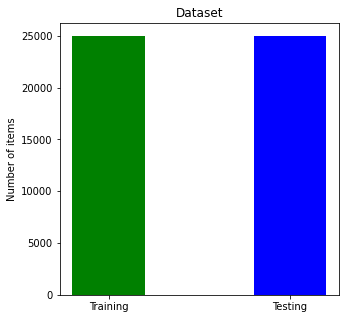

In [ ]:
data = {'Training':len(train_data),'Testing':len(test_data)}
train = list(data.keys())
test = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
plt.bar(train, test, color=['green', 'blue'],
        width = 0.4)
 
plt.ylabel("Number of items")
plt.title("Dataset")
plt.show()

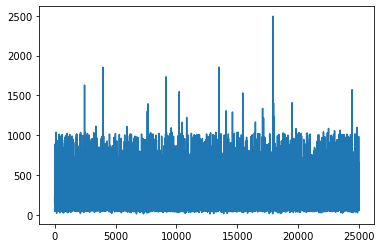

In [ ]:
train_data_plot = [len(i) for i in train_data]
plt.plot(train_data_plot)

In [ ]:
max_len_train = max([len(i) for i in train_data])
print(max_len_train)

2494


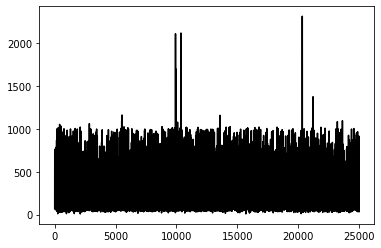

In [ ]:
test_data_plot = [len(i) for i in test_data]
plt.plot(test_data_plot, color = 'black')

In [ ]:
max_len_test = max([len(i) for i in test_data])
print(max_len_test)

2315


In [ ]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
 
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)


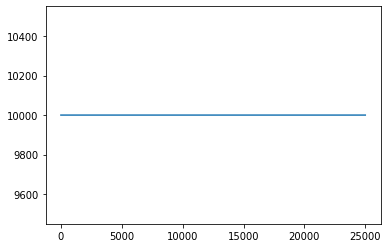

In [ ]:
train_data_plot = [len(i) for i in train_data]
plt.plot(train_data_plot)

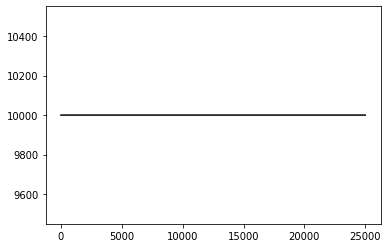

In [ ]:
test_data_plot = [len(i) for i in test_data]
plt.plot(test_data_plot, color = 'black')

# Creating the neural network model

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape=(10000, )))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation = "relu",kernel_regularizer=regularizers.l2(0.07)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 643,233
Trainable params: 643,233
Non-trai

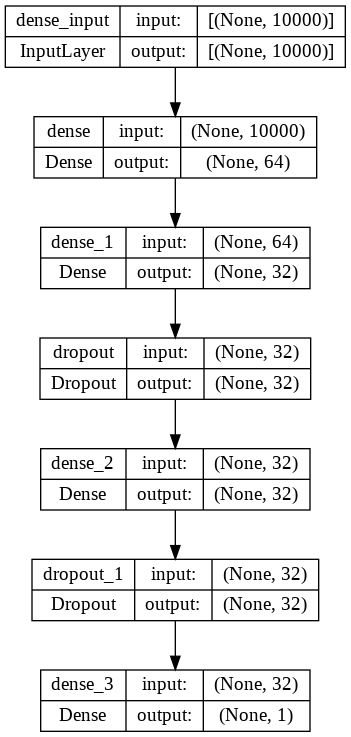

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
opt = tf.keras.optimizers.experimental.Adam(learning_rate=0.001) 

model.compile(optimizer = opt ,loss = 'binary_crossentropy',metrics = ['accuracy'])

# Training part

In [ ]:
history = model.fit(
 train_data, train_label,
 epochs= 2,
 batch_size = 256
)

Epoch 1/2
98/98 [==============================] - 5s 33ms/step - loss: 1.9235 - accuracy: 0.7543
Epoch 2/2
98/98 [==============================] - 3s 32ms/step - loss: 0.8005 - accuracy: 0.8989


# Testing part

In [ ]:
test_results = model.evaluate (test_data, test_label)

782/782 [==============================] - 3s 4ms/step - loss: 0.5612 - accuracy: 0.8868


In [ ]:
difference = (history.history['accuracy'][1] * 100) - (test_results[1] * 100)
print("Difference: %.2f%%" % (difference))


Difference: 1.21%


In [ ]:
predictions = model.predict(test_data)
conf_matrix = confusion_matrix(test_label, predictions > 0.5)

782/782 [==============================] - 3s 3ms/step


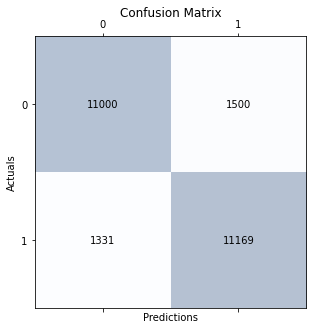

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='medium')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


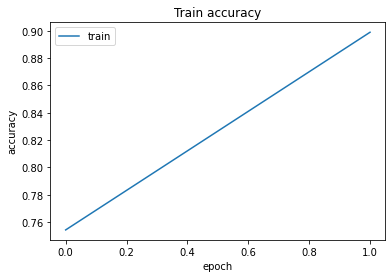

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()